<a href="https://colab.research.google.com/github/abdulwasaeee/handson-ml3/blob/main/practice/CH1%3A%20TheMachineLearninglandscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
source="https://github.com/ageron/data/raw/main/"

In [3]:
df=pd.read_csv(source+ "lifesat/lifesat.csv")

In [4]:
df.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [6]:
df.isnull().sum()

,0
Country,0
GDP per capita (USD),0
Life satisfaction,0


In [15]:
x=df[['GDP per capita (USD)']]
y=df[['Life satisfaction']]

In [16]:
xt,xv,yt,yv=train_test_split(x,y,test_size=0.25,random_state=42)

In [17]:
lr=LinearRegression()
lr.fit(xt,yt)

LinearRegression()

In [116]:
lrfull=LinearRegression()
lrfull.fit(xv,yv)

LinearRegression()

In [19]:
r2_score(yv,lr.predict(xv))

0.3405219263600975

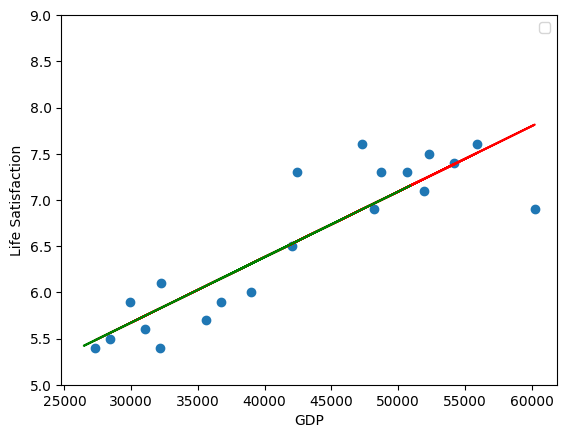

In [117]:
plt.scatter(xt,yt)
plt.ylim(5,9)
plt.xlabel('GDP')
plt.ylabel('Life Satisfaction')
plt.plot(xt,lr.predict(xt),c='r')
plt.plot(xv,lr.predict(xv),c='g')
plt.legend()

In [35]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(xt,yt)

KNeighborsRegressor(n_neighbors=3)

In [36]:
r2_score(yv,knn.predict(xv))

0.10762656147271643

/tmp/ipython-input-3645359270.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


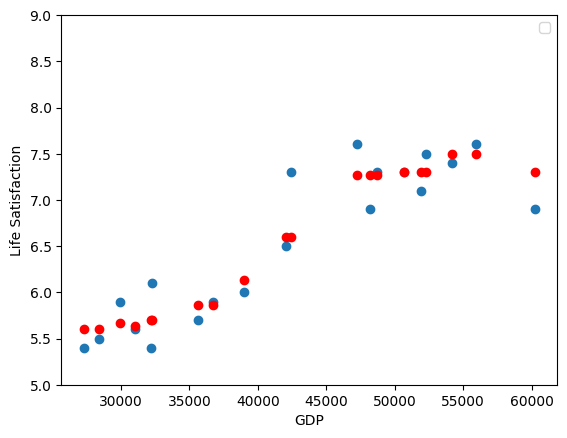

In [38]:
plt.scatter(xt,yt)
plt.ylim(5,9)
plt.xlabel('GDP')
plt.ylabel('Life Satisfaction')
plt.scatter(xt,knn.predict(xt),c='r')
plt.legend()

In [46]:
print(lr.predict([[26456]]), knn.predict([[26456]]))

[[5.42142649]] [[5.6]]


In [54]:
print(df[['GDP per capita (USD)']].max())
print(df[['GDP per capita (USD)']].min())
print(df.iloc[np.argmax(df['GDP per capita (USD)'])])

GDP per capita (USD)    60235.728492
dtype: float64
GDP per capita (USD)    26456.387938
dtype: float64
Country                 United States
GDP per capita (USD)     60235.728492
Life satisfaction                 6.9
Name: 26, dtype: object


In [57]:
lr.intercept_

array([3.5469328])

In [58]:
lr.coef_

array([[7.08532538e-05]])

In [69]:
lr.predict([[27287]])

array([[5.48030554]])

In [68]:
df.loc[df[['Life satisfaction']].idxmin()]

,Country,GDP per capita (USD),Life satisfaction
1,Greece,27287.083401,5.4


In [107]:
scaler=StandardScaler()
poly=PolynomialFeatures(degree=10,include_bias=True)
lr2=LinearRegression()
pipeline=Pipeline([
    ('poly',poly), ('scaler',scaler), ('lr',lr2)
])

In [109]:
pipeline.fit(xt,yt)

Pipeline(steps=[('poly', PolynomialFeatures(degree=10)),
                ('scaler', StandardScaler()), ('lr', LinearRegression())])

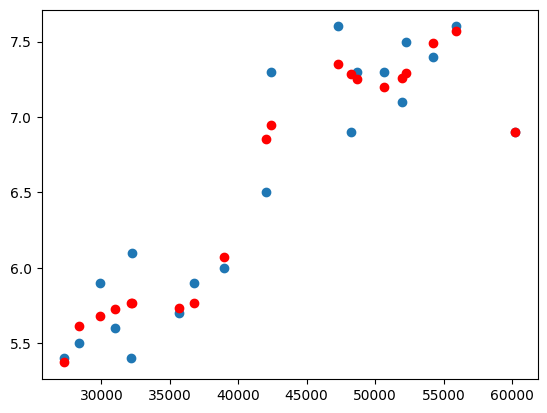

In [111]:
plt.scatter(xt,yt)
plt.scatter(xt,pipeline.predict(xt), c='r')
